In [1]:
import time
import random
from math import *
import operator
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
#from sklearn import preprocessing, cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
"""
5. Number of Instances: 214
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""

'\n5. Number of Instances: 214\n6. Number of Attributes: 10 (including an Id#) plus the class attribute\n   -- all attributes are continuously valued\n7. Attribute Information:\n   1. Id number: 1 to 214\n   2. RI: refractive index\n   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as \n                  are attributes 4-10)\n   4. Mg: Magnesium\n   5. Al: Aluminum\n   6. Si: Silicon\n   7. K: Potassium\n   8. Ca: Calcium\n   9. Ba: Barium\n  10. Fe: Iron\n  11. Type of glass: (class attribute)\n      -- 1 building_windows_float_processed\n      -- 2 building_windows_non_float_processed\n      -- 3 vehicle_windows_float_processed\n      -- 4 vehicle_windows_non_float_processed (none in this database)\n      -- 5 containers\n      -- 6 tableware\n      -- 7 headlamps\n\n9. Class Distribution: (out of 214 total instances)\n    -- 163 Window glass (building windows and vehicle windows)\n       -- 87 float processed  \n          -- 70 building windows\n          --

In [2]:
location = r"E:\Python\Machine Learning\datasets\glass.csv"
location

'E:\\Python\\Machine Learning\\datasets\\glass.csv'

In [3]:
# load the training data from glass data set
df_training = pd.read_csv(location)

In [4]:
df_training.head(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [5]:
df_training.corr()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


In [8]:
df_training.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# Question: Pretend that we want to predict ri, and our only feature is al. 
# How could we do it using machine learning?

# Answer: We could frame it as a regression problem, and use a linear 
#         regression model with al as the only feature and ri as the 
#         response.

# Question: How would we visualize this model?

# Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, 
#         and draw the line of best fit.

In [5]:

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

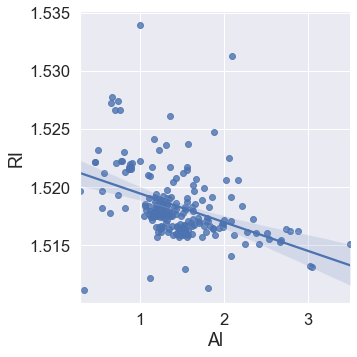

In [6]:
sns.lmplot(x='Al', y='RI', data=df_training, ci = None)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


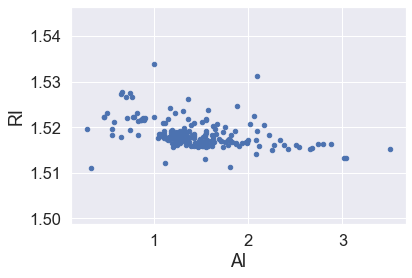

In [8]:
# Question: How would we draw this plot without using Seaborn?

# scatter plot using Pandas
df_training.plot(kind='scatter', x='Al', y='RI')

In [6]:
df_training.Al

0      1.10
1      1.36
2      1.54
3      1.29
4      1.24
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 214, dtype: float64

In [17]:
# fit a linear regression model
linreg = LinearRegression()

feature_cols = ['Al', 'Si','K']

X = df_training[feature_cols]

y = df_training.RI

linreg.fit(X, y)

LinearRegression()

In [18]:
X1=df_training.iloc[:,2:10]

In [21]:
linreg2 = LinearRegression()
linreg2.fit(X1,y)

LinearRegression()

In [22]:
linreg2.predict(X1)

array([1.52006514, 1.51665453, 1.51582941, 1.51718923, 1.51672624,
       1.51626723, 1.5170828 , 1.51711864, 1.51829324, 1.51740447,
       1.51602502, 1.51772978, 1.51610418, 1.51709125, 1.51716941,
       1.51700237, 1.51804423, 1.52118296, 1.51952254, 1.51735481,
       1.51739154, 1.52102878, 1.51801421, 1.51770321, 1.51766961,
       1.51773162, 1.51749309, 1.51704201, 1.51706172, 1.51756381,
       1.51782753, 1.5174436 , 1.5178356 , 1.5171205 , 1.51789787,
       1.51795457, 1.51969963, 1.51773762, 1.52222746, 1.52222746,
       1.51812907, 1.51742684, 1.5178434 , 1.52221391, 1.51797411,
       1.51948678, 1.51855555, 1.52237069, 1.5222177 , 1.5191654 ,
       1.52292506, 1.5194247 , 1.51851634, 1.51818567, 1.51807746,
       1.51721172, 1.51713981, 1.51708085, 1.51715375, 1.51761485,
       1.51869189, 1.52051292, 1.52146062, 1.52231445, 1.52136716,
       1.52057347, 1.52144011, 1.52145696, 1.52136384, 1.52247428,
       1.51614827, 1.51841757, 1.51585019, 1.51622903, 1.51598

In [10]:
X.shape

(214, 8)

In [13]:
y.shape

(214,)

In [11]:
# make predictions for all values of X
df_training['RI_pred'] = linreg.predict(X)

df_training.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,RI_pred
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.521697
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518364
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.517536
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518652
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.517664


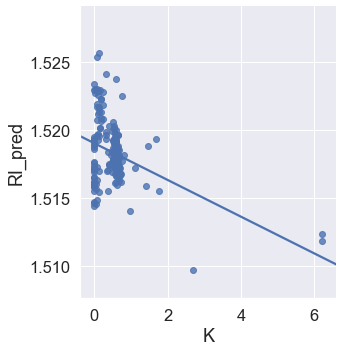

In [12]:
sns.lmplot(x='K', y='RI_pred', data=df_training, ci=None)

In [13]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.68970535, 1.68876574, 1.69065262])

In [14]:
# compute prediction for al=2 using the predict method
linreg.predict([[2,3,4],[1,2,1]])

array([1.67693705, 1.68545268])

In [15]:
linreg.intercept_

1.6934920437923429

In [16]:
linreg.coef_

array([-0.00189335, -0.00236315, -0.00141971])

In [17]:
# Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.00247761

1.51451251

In [7]:
# compute prediction for al=3 using the predict method
linreg.predict([3])

NameError: name 'linreg' is not defined